In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

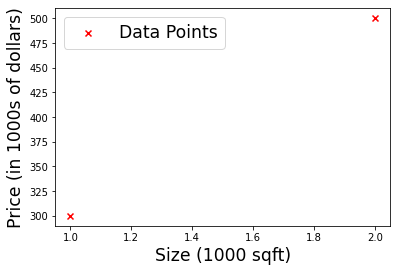

In [11]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

In [12]:
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear', )

In [13]:
linear_layer.get_weights()

[]

In [14]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[1.6977934]], shape=(1, 1), dtype=float32)


In [15]:
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[1.6977934]], b=[0.]


In [16]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [17]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [21]:
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0', dldarkblue =  '#0D5BDC')

In [22]:
def plt_linear(X_train, Y_train, prediction_tf, prediction_np):
    fig, ax = plt.subplots(1,2, figsize=(16,4))
    ax[0].scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
    ax[0].plot(X_train, prediction_tf,  c=dlc['dlblue'], label="model output")
    ax[0].text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color=dlc['dlmagenta'])
    ax[0].legend(fontsize='xx-large')
    ax[0].set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
    ax[0].set_xlabel('Size (1000 sqft)', fontsize='xx-large')
    ax[0].set_title("Tensorflow prediction",fontsize='xx-large')

    ax[1].scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
    ax[1].plot(X_train, prediction_np,  c=dlc['dlblue'], label="model output")
    ax[1].text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color=dlc['dlmagenta'])
    ax[1].legend(fontsize='xx-large')
    ax[1].set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
    ax[1].set_xlabel('Size (1000 sqft)', fontsize='xx-large')
    ax[1].set_title("Numpy prediction",fontsize='xx-large')
    plt.show()

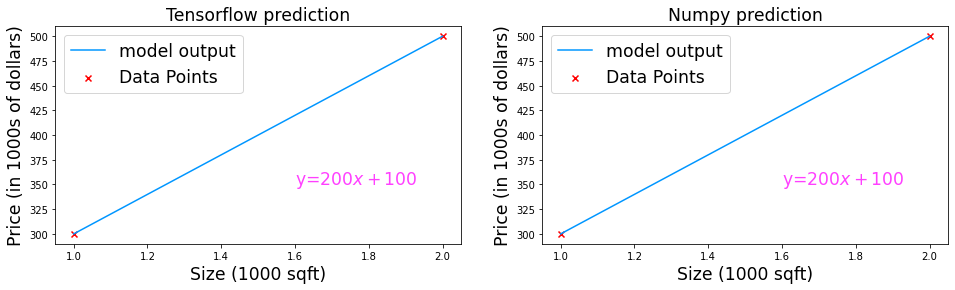

In [23]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b
plt_linear(X_train, Y_train, prediction_tf, prediction_np)

In [24]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

In [25]:
pos = Y_train == 1
neg = Y_train == 0
X_train[pos]

array([3., 4., 5.], dtype=float32)

In [26]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [28]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[0.33081424]] [0.]
(1, 1) (1,)


In [29]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [33]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)

[[0.01098695]]
